In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
#Downloading the dataset
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
data.describe(include="all")

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


In [5]:
data.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [6]:
loan_status = data['loan_status'].value_counts()

Text(0, 0.5, 'Count')

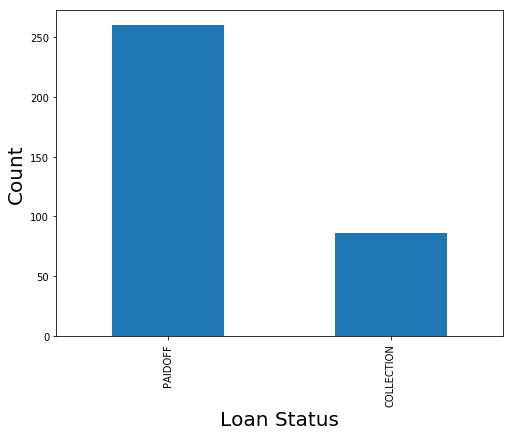

In [7]:
plt.figure(figsize=(8,6))
loan_status.plot.bar()
plt.xlabel("Loan Status", fontsize=20)
plt.ylabel("Count", fontsize=20)

In [8]:
data[['loan_status','Gender']].groupby(['Gender'], as_index=False).count()

,Gender,loan_status
0,female,52
1,male,294


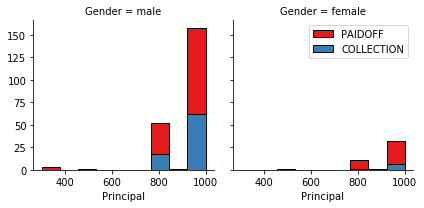

In [9]:
bins = np.linspace(data.Principal.min(), data.Principal.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [10]:
data['due_date'] = pd.to_datetime(data['due_date'])
data['effective_date'] = pd.to_datetime(data['effective_date'])

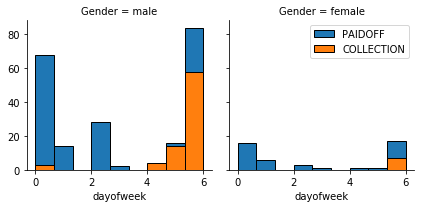

In [11]:
data['dayofweek'] = data['effective_date'].dt.dayofweek
bins = np.linspace(data.dayofweek.min(), data.dayofweek.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [12]:
pd.get_dummies(data['education'])

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,1,0,0


In [13]:
clean_data = data

In [14]:
clean_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4
5,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male,4
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,4
7,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,5
8,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male,5
9,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,5


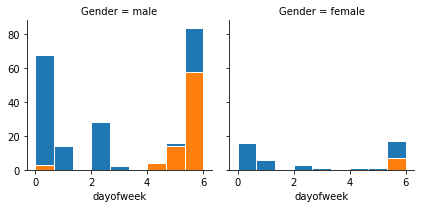

In [15]:
data['dayofweek'] = data['effective_date'].dt.dayofweek
bins = np.linspace(data['dayofweek'].min(), data['dayofweek'].max(), 10)
g = sns.FacetGrid(data, col='Gender', hue='loan_status', col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="w")
plt.show()

In [16]:
clean_data['weekend'] = clean_data['dayofweek'].apply(lambda x:1 if (x>3) else 0)